In [1]:
# Start by running this cell. This loads the required libraries that are used throughout this analysis.
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# STAT 201 Project Proposal: Analyzing Credit Score Bias Between Caucasians and African Americans

## Introduction

Credit scores are three-digit numbers that represent an individual's credit risk. They are used to estimate the creditworthiness of an individual for credit cards, mortgages, and other loans. 

Credit ratings are supposed to eliminate racial bias by using a set formula. However, some research states that despite complicated algorithms, there is still bias in credit ratings for individuals of colour *(1)*. A 2010 journal article found that black households have "*significantly lower average credit scores than similarly situated non-black households*" *(2)*. **This project sets out to determine whether there is any racial bias between an individual's ethnicity and their credit score. Specifically, we focus on the mean difference between Caucasian and African American credit scores.**

Our dataset was downloaded from Kaggle *(3)*. The dataset includes data on 400 individuals' income, credit card limit, credit rating, age, education level, gender, student status, marital status, ethnicity, and credit card balance.

## Preliminary Results

The first step is to download the dataset from the web, unzip the files, and load the dataset into R:

In [2]:
# In order to keep our folder structure clean, the code below creates a "data" directory where we will store our raw data
# NOTE: If the "data" folder already exists, a warning message will appear - you can ignore the message
dir.create("data")

# Downloads the credit.zip file, and unzips the required csv file into our data folder
url = "https://github.com/TornTech/STAT201/raw/main/credit.zip"
download.file(url,"data/credit.zip")
unzip("data/credit.zip", files="credit.csv", exdir="data/")

Warning message in dir.create("data"):
“'data' already exists”


In [3]:
# Reads CSV into an R dataframe
credit <- read_csv("data/credit.csv") 
print("Figure 1")
head(credit)
nrow(credit)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  ID = col_double(),
  Income = col_double(),
  Limit = col_double(),
  Rating = col_double(),
  Cards = col_double(),
  Age = col_double(),
  Education = col_double(),
  Gender = col_character(),
  Student = col_character(),
  Married = col_character(),
  Ethnicity = col_character(),
  Balance = col_double()
)



[1] "Figure 1"


X1,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


[1] 400

>As the focus is on Caucasian and African Americans, we removed all Asian individuals from the dataset:

In [4]:
credit = filter(credit, Ethnicity != "Asian")

>Next, we will only select the columns required for our analysis.

In [5]:
credit <- credit %>% 
    select(Rating, Ethnicity)

head(credit)

Rating,Ethnicity
<dbl>,<chr>
283,Caucasian
357,Caucasian
569,Caucasian
259,African American
266,Caucasian
491,African American


>We conducted the preliminary analysis by calculating the average credit rating in each ethnic group and plotting the range on a boxplot.

In [6]:
credit_summary <- credit %>% 
    group_by(Ethnicity) %>% 
    summarize(n = n(), Median_Rating = median(Rating), Average_Rating = mean(Rating), Standard_Dev = sd(Rating))
print("Figure 2")
credit_summary

`summarise()` ungrouping output (override with `.groups` argument)



[1] "Figure 2"


Ethnicity,n,Median_Rating,Average_Rating,Standard_Dev
<chr>,<int>,<dbl>,<dbl>,<dbl>
African American,99,341,365.0707,166.9901
Caucasian,199,351,354.7739,147.3527


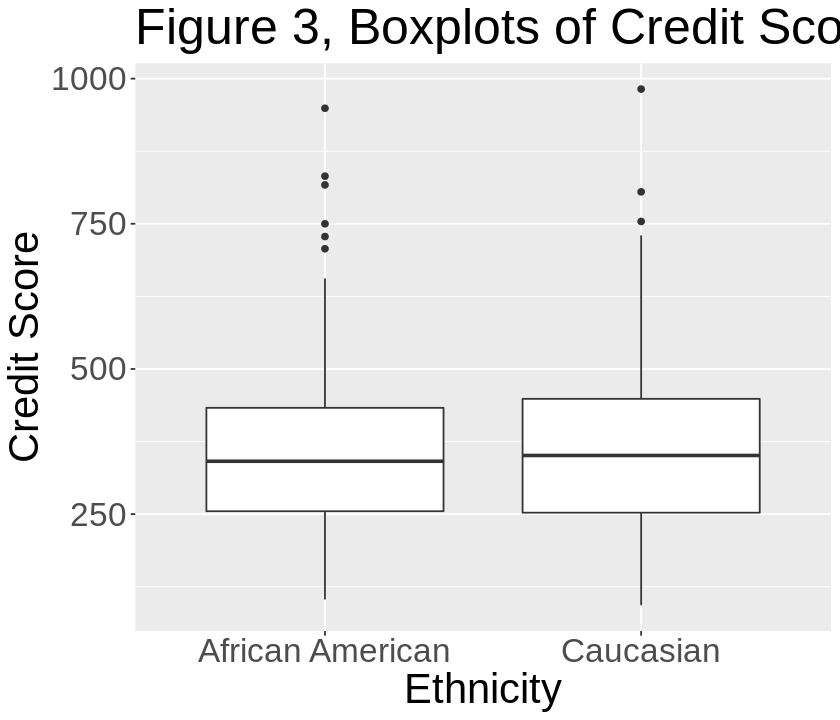

In [7]:
options(repr.plot.height = 6, repr.plot.width = 7)

boxplots <- credit %>%  
    ggplot(aes(x = Ethnicity, y = Rating)) + 
    geom_boxplot() + 
    ylab("Credit Score") +
    ggtitle("Figure 3, Boxplots of Credit Scores") +
    theme(text = element_text(size=25))

boxplots

>We also looked at the histograms overlapping to compare:

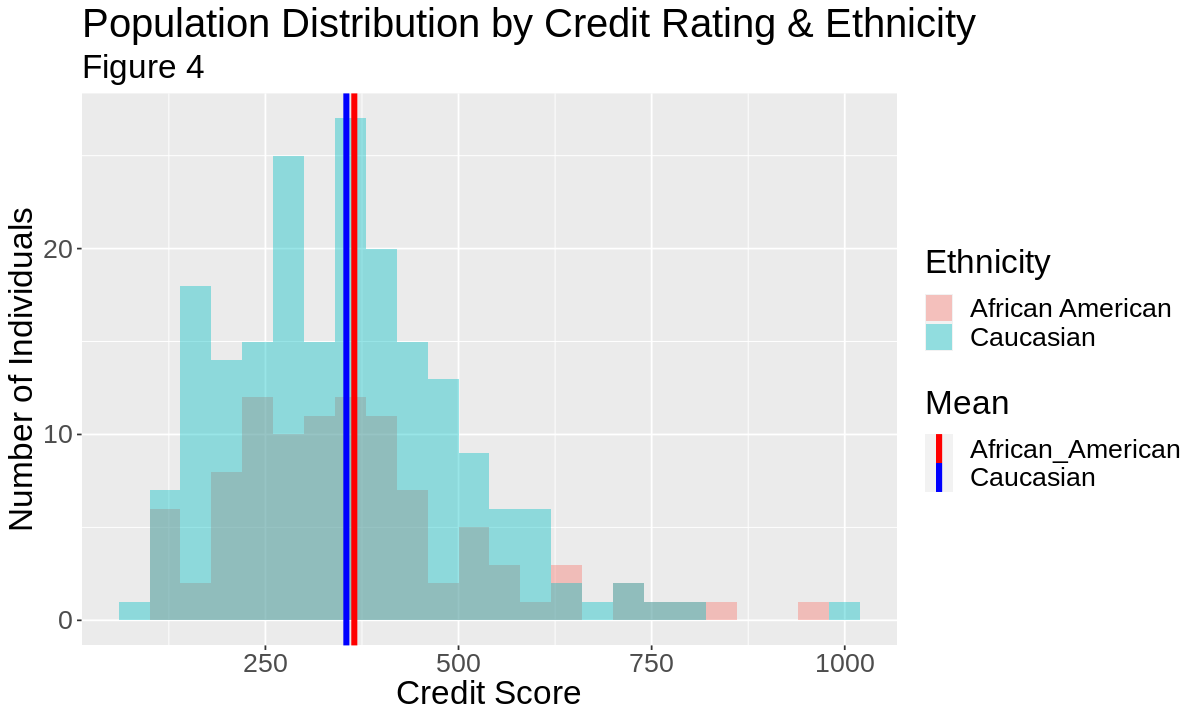

In [8]:
options(repr.plot.height = 6, repr.plot.width = 10)

overlayed_distribution = credit %>% 
    ggplot(aes(x = Rating, fill = Ethnicity)) +
    geom_histogram(position = "identity", binwidth = 40, alpha = 0.4) +
    labs(x = "Credit Score", y = "Number of Individuals", 
         title = "Population Distribution by Credit Rating & Ethnicity",
         subtitle = "Figure 4") +
    theme(text = element_text(size = 20)) + 
    geom_vline(aes(xintercept = credit_summary$Average_Rating[1], color = "African_American"), size = 1.7) +
    geom_vline(aes(xintercept = credit_summary$Average_Rating[2], color = "Caucasian"), size = 1.7) +
    scale_color_manual(name = "Mean", values = c(African_American = "red", Caucasian = "blue"))

overlayed_distribution

> We now take a selection of 1000 Bootstrap samples to create our approximation of the sampling distribution, alongside the relevant confidence intervals and sample statistics.

Median,Mean,Standard_Deviation
<dbl>,<dbl>,<dbl>
-9.574432,-10.59056,20.34095


lower_ci,upper_ci
<dbl>,<dbl>
-55.41571,29.05704


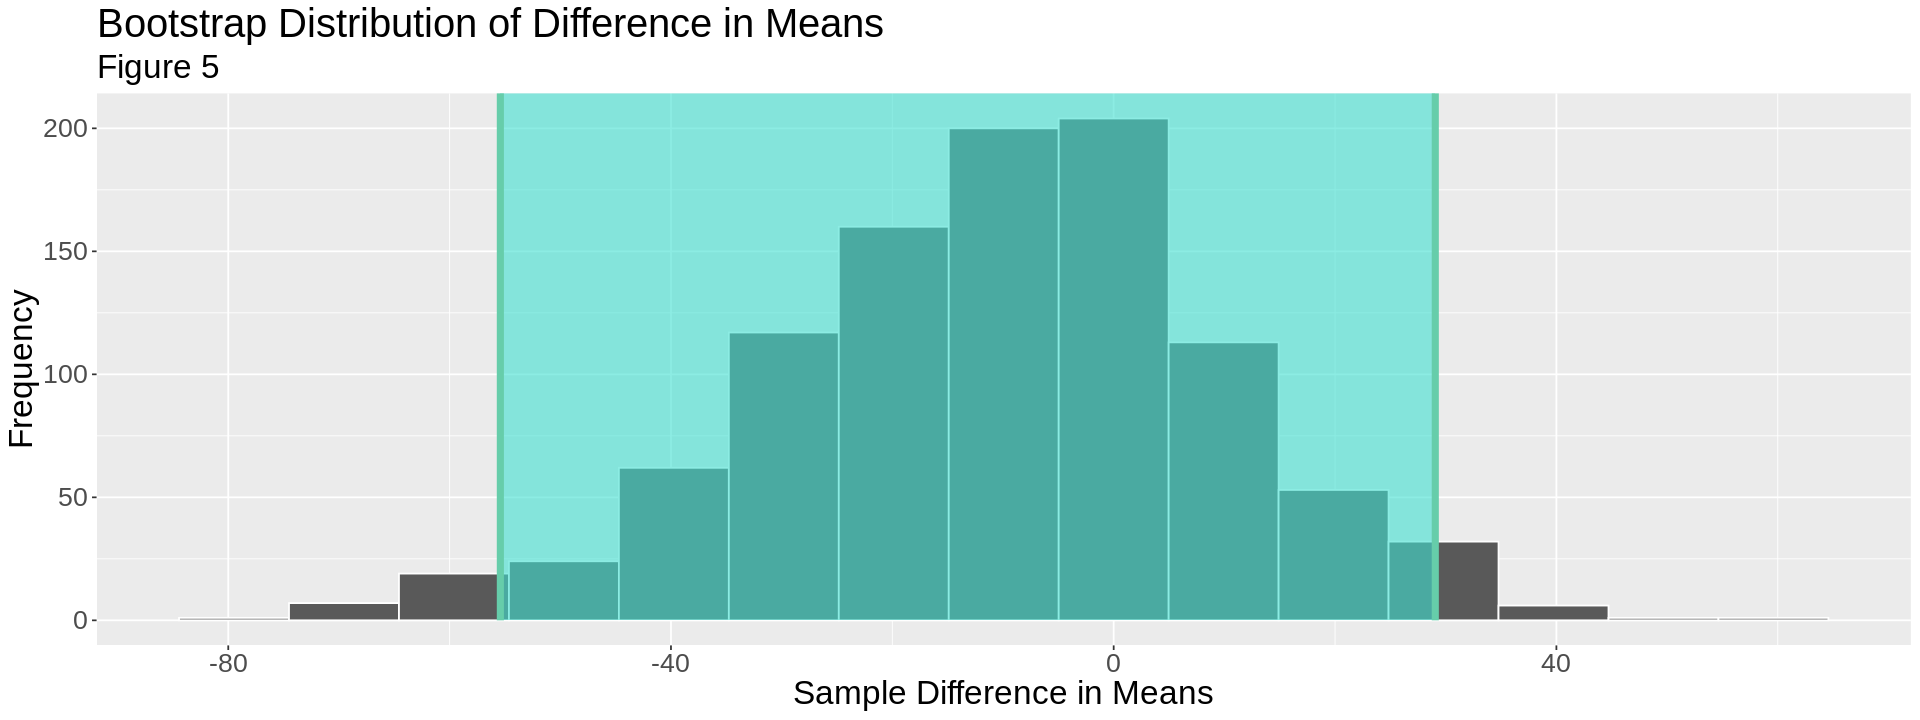

In [14]:
set.seed(1234)

bootstrap_dist = credit %>% 
    specify(formula = Rating ~ Ethnicity) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("Caucasian", "African American"))

bootstrap_ci = bootstrap_dist %>% 
    get_ci(0.95, type = "percentile")

bootstrap_summary <- bootstrap_dist %>% 
    summarise(Median = median(stat), Mean = mean(stat), Standard_Deviation = sd(stat))

bootstrap_summary

bootstrap_ci

bootstrap_dist_graph <- visualize(bootstrap_dist) + 
    shade_ci(endpoints = bootstrap_ci) + 
    labs(x = "Sample Difference in Means", y = "Frequency", 
         title = "Bootstrap Distribution of Difference in Means",subtitle = "Figure 5") + 
    theme(text = element_text(size = 20))

bootstrap_dist_graph

> Using the Bootstrap mean of sample difference in means we just found, we can now see if our null hypothesis is valid.

Warning message:
“Parameter values are not specified when testing that two variables are independent.”


lower_ci,upper_ci
<dbl>,<dbl>
-36.5577,37.26125


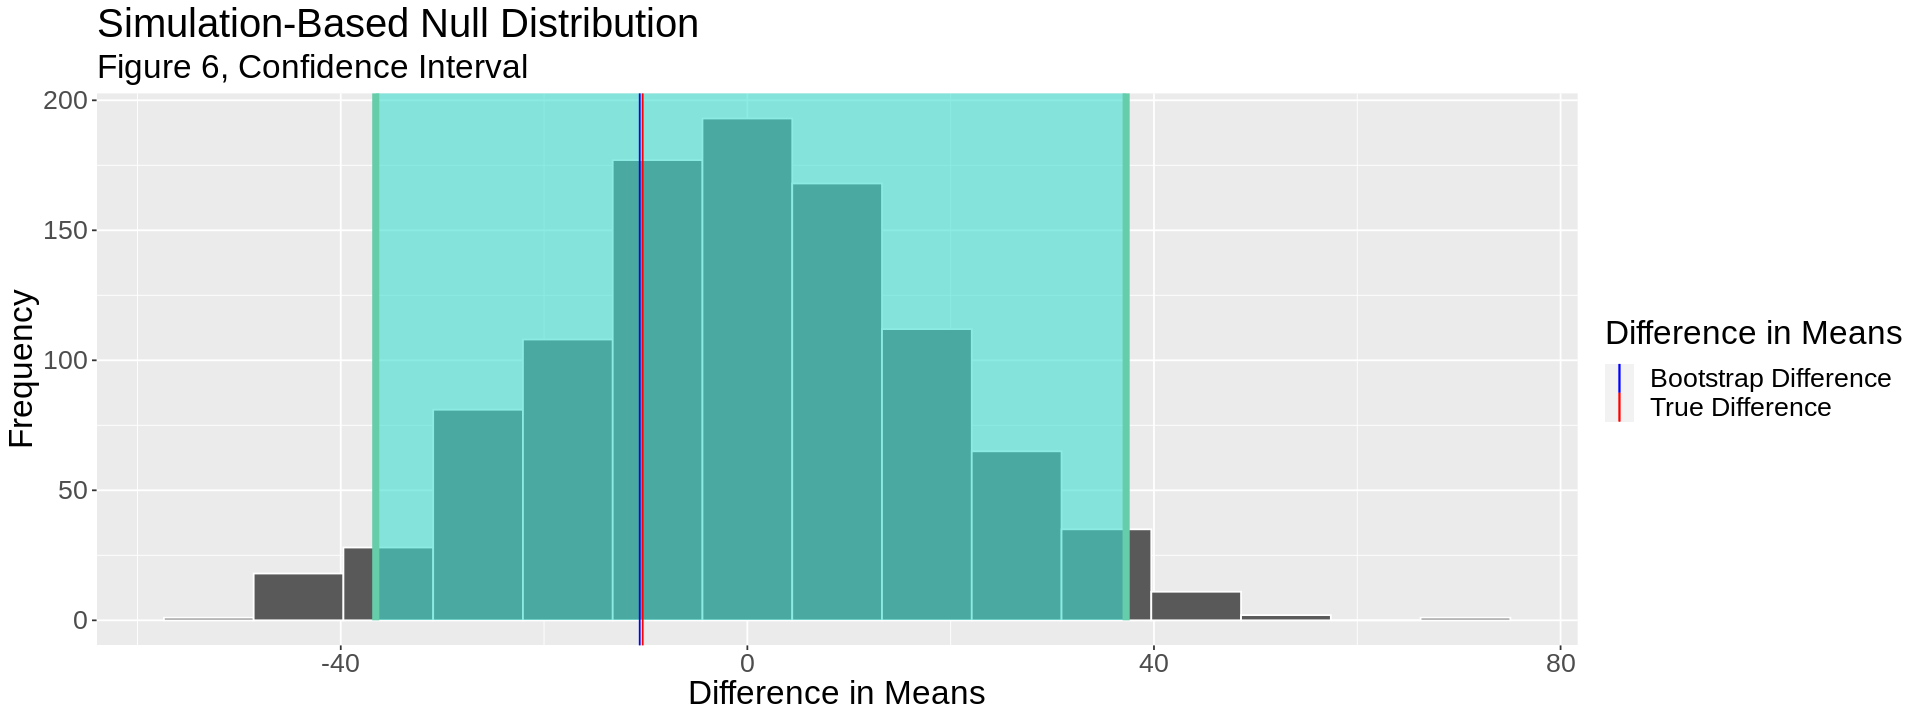

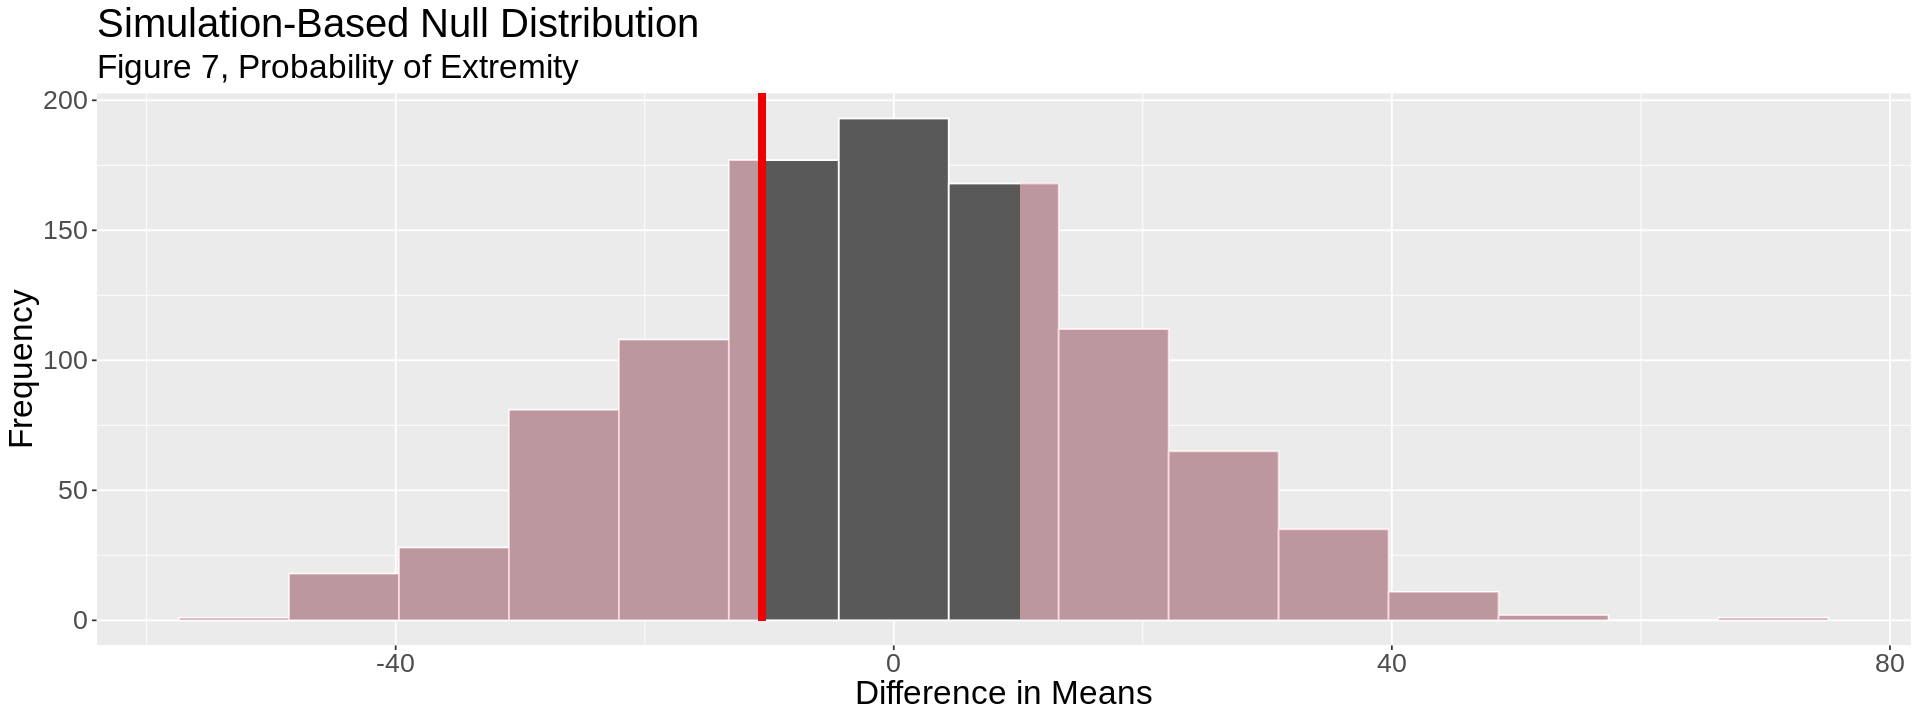

In [10]:
set.seed(1234)

diff_in_mean_bootstrap_dist <- credit %>%
    specify(formula = Rating ~ Ethnicity) %>% 
    hypothesise(mu  = 0,null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>% 
    calculate(stat="diff in means", order = c("Caucasian", "African American"))

p_value = get_p_value(diff_in_mean_bootstrap_dist, 
                      obs_stat = credit_summary$Average_Rating[2] - credit_summary$Average_Rating[1], 
                      direction = "both")

bootstrap_ci <- diff_in_mean_bootstrap_dist %>% 
    get_ci(0.95, type = "percentile")

bootstrap_ci

bootstrap_ci_graph <- visualize(diff_in_mean_bootstrap_dist) + 
    shade_ci(endpoints = bootstrap_ci) + 
    labs(x = "Difference in Means", y = "Frequency", subtitle = "Figure 6, Confidence Interval") + 
    theme(text = element_text(size = 20)) +
    geom_vline(aes(xintercept = credit_summary$Average_Rating[2] - credit_summary$Average_Rating[1], 
                   color = "True Difference")) + 
    geom_vline(aes(xintercept = mean(bootstrap_dist$stat), 
                   color = "Bootstrap Difference")) +  
    scale_color_manual(name = "Difference in Means", values = c('True Difference' = "red",'Bootstrap Difference'  = "blue"))

bootstrap_p_graph <- visualize(diff_in_mean_bootstrap_dist) + 
    labs(x = "Difference in Means", y = "Frequency", subtitle = "Figure 7, Probability of Extremity") + 
    theme(text = element_text(size = 20)) +
    shade_p_value(obs_stat = mean(bootstrap_dist$stat), direction = "both")

options(repr.plot.width = 16, repr.plot.height = 6)
bootstrap_ci_graph 
bootstrap_p_graph

In Figure 6 we took the null distribution, generated with the infer package, and overlayed the confidence interval. We then placed the true difference in mean credit score rating between the Caucasian and African American populations in our sample, alongside the bootstrap sample distribution of the same statistic. In the case of both means, they fall well within the 95% confidence interval. 

Figure 7 does the opposite, finding the probability of getting a value as extreme as the estimated mean difference between ethnicities. In this case, the probability of getting the estimated difference in means is very high, which in combination with the previous point validates the null hypothesis.

## Methods: Plan

This report contains a relatively clean dataset as there are no missing values in the cells. It is also a fairly large sample size of 400, meaning that it contains a decent representation of our population and our explanatory variable of interest (ethnicity). 

However, we need to assess the quality of information present. One aspect that needs to be addressed for our question of interest is how many elements within the sample belong to each ethnic group. If one ethnicity group only has a small proportion of people, it may have a higher standard deviation and will not be a good representation of the ethnicity. We are interested in determining whether ethnicity is related to differences in credit rating between individuals. 

##### The following are our two hypotheses:
>$H_0$: The mean credit score of Caucasians is the same as the mean credit score of African Americans.
>
>$H_A$: The mean credit score of Caucasians is different from the mean credit score of African Americans.

A 95% confidence interval can be calculated from the sample to give a range that we are 95% confident contains the true population parameter. We will also include a histogram showing the distribution of credit scores within our sample to get a better visualization of the credit rating values.

For the final result, if we reject the null hypothesis, there are a variety of causal questions that may ask why there is this difference. If there is no difference, we can also look at the other categories that separate individuals such as gender to determine if there are differences there.

The dataset we have based all of the estimates and plots on is not the population. It is a sample of the population, and as such is subject to error. Estimates like the 95% confidence interval and the means calculated for each ethnicity are not necessarily true for the larger population - to get a look at what the true population may look like, we must extrapolate from bootstrap samples.

Based on the research articles we found, we anticipate there will be a significant difference in the mean credit scores between Caucasians and African Americans. As far as impact goes, it could either confirm or reject perceived racial biases in the financial world. 

Future questions our research could lead to is how do other ethnicities' credit scores relate to one another? In addition, if we find any difference in the credit scores, what factors could lead to this difference?

## References

>1) Singletary, M. (2020, October 16). Perspective | credit scores are supposed to be race-neutral. that's impossible. Retrieved March 02, 2021, from https://www.washingtonpost.com/business/2020/10/16/how-race-affects-your-credit-score/
>
>2) Nelson, A. (2010). Credit Scores, Race, and Residential Sorting. Journal of Policy Analysis and Management, 29(1), 39-68. Retrieved March 02, 2021, from http://www.jstor.org/stable/20685167
>
>3) Johar M. A (2020). Credit Card Balance Data. Retrieved Feb 28, 2021, from https://www.kaggle.com/ukveteran/credit-card-balance-data